In [41]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
from pandas.core.frame import DataFrame
import datetime

In [42]:
data = pd.read_csv('../result/ma_trade_log.csv')
# data['datetime'] = pd.to_datetime(data['datetime'],format="%Y-%d-%m")
data['datetime'] = pd.to_datetime(data['datetime'],infer_datetime_format=True)
print(data)
# data.loc[5]['price']
# print(len(data))

   action     price    amount   datetime
0   short   6561.99  1.523928 2017-11-14
1   cover   7794.63  1.523928 2017-11-16
2     buy   7794.63  1.282935 2017-11-16
3    sell  13839.37  1.282935 2017-12-23
4   short  13839.37  0.722576 2017-12-23
5   cover  17000.00  0.722576 2018-01-06
6     buy  17000.00  0.588235 2018-01-06
7    sell  13777.00  0.588235 2018-01-12
8   short  13777.00  0.725847 2018-01-12
9   cover  10164.28  0.725847 2018-02-16
10    buy  10164.28  0.983838 2018-02-16
11   sell   9220.00  0.983838 2018-03-09
12  short   9220.00  1.084599 2018-03-09
13  cover   7873.74  1.084599 2018-04-13
14    buy   7873.74  1.270044 2018-04-13
15   sell   8398.15  1.270044 2018-05-11
16  short   8398.15  1.190738 2018-05-11
17  cover   7488.06  1.190738 2018-06-09
18    buy   7488.06  1.335459 2018-06-09
19   sell   6761.53  1.335459 2018-06-10
20  short   6761.53  1.478955 2018-06-10
21  cover   6512.18  1.478955 2018-07-03
22    buy   6512.18  1.535584 2018-07-03
23   sell   6217

In [43]:
funds_list = []
date_list = []

In [44]:
for i in range(int(len(data)/2)):
    if len(date_list) == 0:
        funds_list.append(0)
        date_list.append(data.loc[0]['datetime'])
    if data.loc[i*2]['action'] == 'buy':
        funds_list.append((data.loc[i*2+1]['price']-data.loc[i*2]['price'])*data.loc[i*2]['amount'])
    elif data.loc[i*2]['action'] == 'short':
        funds_list.append(-(data.loc[i*2+1]['price']-data.loc[i*2]['price'])*data.loc[i*2]['amount'])
    date_list.append(data.loc[i*2+1]['datetime'])

In [45]:
c={"date" : date_list, "income" : funds_list}#将列表a，b转换成字典
data2=DataFrame(c)#将字典转换成为数据框
data2.set_index(["date"], inplace=True)
print(data2)

                 income
date                   
2017-11-14     0.000000
2017-11-16 -1878.454554
2017-12-23  7755.005690
2018-01-06 -2283.796155
2018-01-12 -1895.882353
2018-02-16  2622.283516
2018-03-09  -929.018091
2018-04-13  1460.151844
2018-05-11   666.024024
2018-06-09  1083.679144
2018-06-10  -970.251307
2018-07-03   368.777481
2018-07-13  -453.227644
2018-07-17 -1763.350024
2018-08-04  -416.254746
2018-08-24   464.067777
2018-09-08  -747.572801
2018-09-22  -869.294532
2018-10-11  -698.633500
2018-10-17  -780.683178
2018-10-26  -299.627302
2018-11-08    90.240422
2018-11-12   -44.111133
2018-12-20  3720.000434
2019-01-12 -1153.417002
2019-02-09  -225.020091
2019-03-04   141.663392
2019-03-09  -607.497383
2019-06-06  9745.762927
2019-06-15 -1317.448123


In [46]:
data3 = data2.cumsum()
print(data3)

                  income
date                    
2017-11-14      0.000000
2017-11-16  -1878.454554
2017-12-23   5876.551136
2018-01-06   3592.754980
2018-01-12   1696.872627
2018-02-16   4319.156143
2018-03-09   3390.138052
2018-04-13   4850.289896
2018-05-11   5516.313920
2018-06-09   6599.993064
2018-06-10   5629.741757
2018-07-03   5998.519238
2018-07-13   5545.291594
2018-07-17   3781.941570
2018-08-04   3365.686823
2018-08-24   3829.754600
2018-09-08   3082.181799
2018-09-22   2212.887267
2018-10-11   1514.253767
2018-10-17    733.570590
2018-10-26    433.943288
2018-11-08    524.183710
2018-11-12    480.072577
2018-12-20   4200.073011
2019-01-12   3046.656009
2019-02-09   2821.635918
2019-03-04   2963.299310
2019-03-09   2355.801927
2019-06-06  12101.564854
2019-06-15  10784.116731


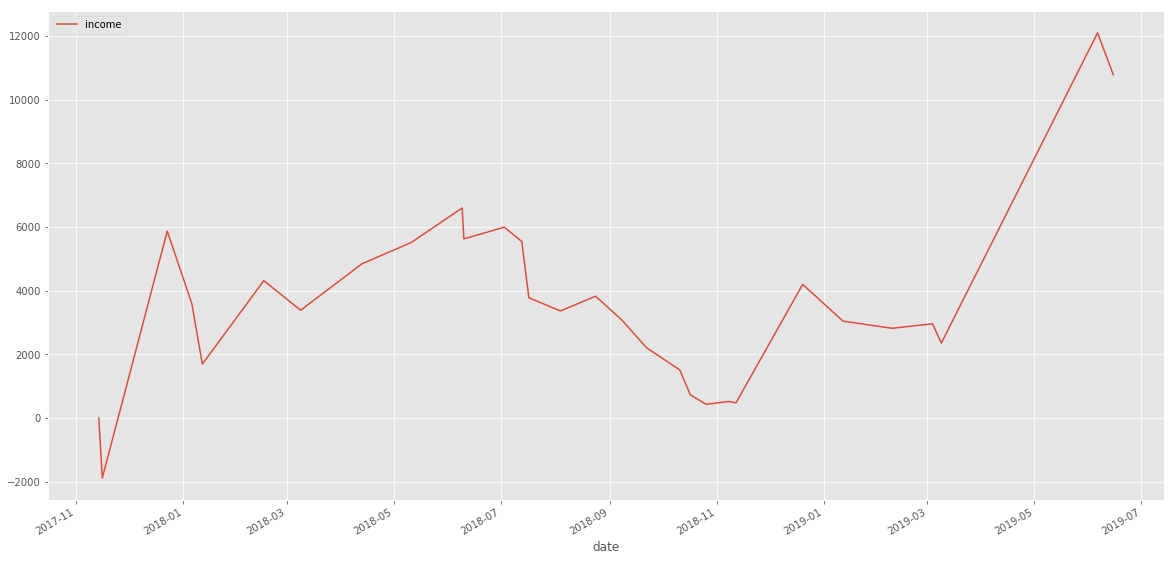

In [47]:
data3.plot(figsize=(20,10))

In [56]:
# 计算最大回撤
equity = data3.copy()
# 计算当日之前资金曲线最高点
equity['max2here'] = equity['income'].expanding().max()
# 计算历史最高值到当日的剩余量。drawdown
equity['dd2here'] = equity['income']/equity['max2here']
equity.index = equity.index.date
equity2 = equity
equity=equity[~equity['dd2here'].isin([np.inf, -np.inf])] # 确定特殊值 inf无穷大
# 计算回撤完生剩余量的最小值，以及最大回撤结束时间
end_date, remains = equity.sort_values(by=['dd2here']).iloc[0].name, equity.sort_values(by=['dd2here']).iloc[0].dd2here
# 计算最大回撤开始时间    
start_date = equity[equity.index<=end_date].sort_values(by='income', ascending=False).iloc[0].name
if np.isnan(remains):
    end_date = equity2.iloc[-1].name
delta = end_date-start_date
print('最大回撤:', round((1-remains)*100, 2), '%')
print('最大回撤开始时间：', start_date)
print('最大回撤结束时间：', end_date)
print('最大回撤时长（高点到低点）：', delta.days, '天')

最大回撤: 93.43 %
最大回撤开始时间： 2018-06-09
最大回撤结束时间： 2018-10-26
最大回撤时长（高点到低点）： 139 天


In [51]:
# 最大回撤天数
end_date3 = 0
for i in range(len(equity)):
    if equity.iloc[i].name < end_date:
        pass
    elif equity.iloc[i].dd2here == 1:
        end_date3 = equity.iloc[i].name
        break
print(end_date3)
if end_date3 == 0:
    end_date3 = equity.iloc[-1].name
delta2 = end_date3-end_date
print('最大回撤时长（高点到低点到突破前高）：', delta2.days, '天')
print('最大回撤突破前高时间：', end_date3)

2019-06-06
最大回撤时长（高点到低点到突破前高）： 223 天
最大回撤突破前高时间： 2019-06-06


In [55]:
# 计算年化收益，参数m:数字货币一年365天，传统市场250天
annualized = data3.copy()
R = annualized.iloc[-1].income/10000.0 # 回测期间总收益,初始资金10000
start_date2 = annualized.iloc[0].name
end_date2 = annualized.iloc[-1].name
n = end_date2-start_date2 # 回测期间总天数
m = 365 # 数字货币一年365天，传统市场250天
if R > 0:
    Rp = (1+R)**(m/n.days)-1
else:
    Rp = 1-(1-R)**(m/n.days)
print('年化收益率：', round(Rp*100, 2), '%')
print('回测总收益率：', round(R*100, 2), '%')

年化收益率： 58.72 %
回测总收益率： 107.84 %


最大回撤: 93.43 %
最大回撤开始时间： 2018-06-09
最大回撤到低点时间： 2018-10-26
最大回撤突破前高时间： 2019-06-06
最大回撤时长（高点到低点）： 139 天
最大回撤时长（高点到低点到突破前高）： 223 天
年化收益率： 58.72 %
回测总收益率： 107.84 %


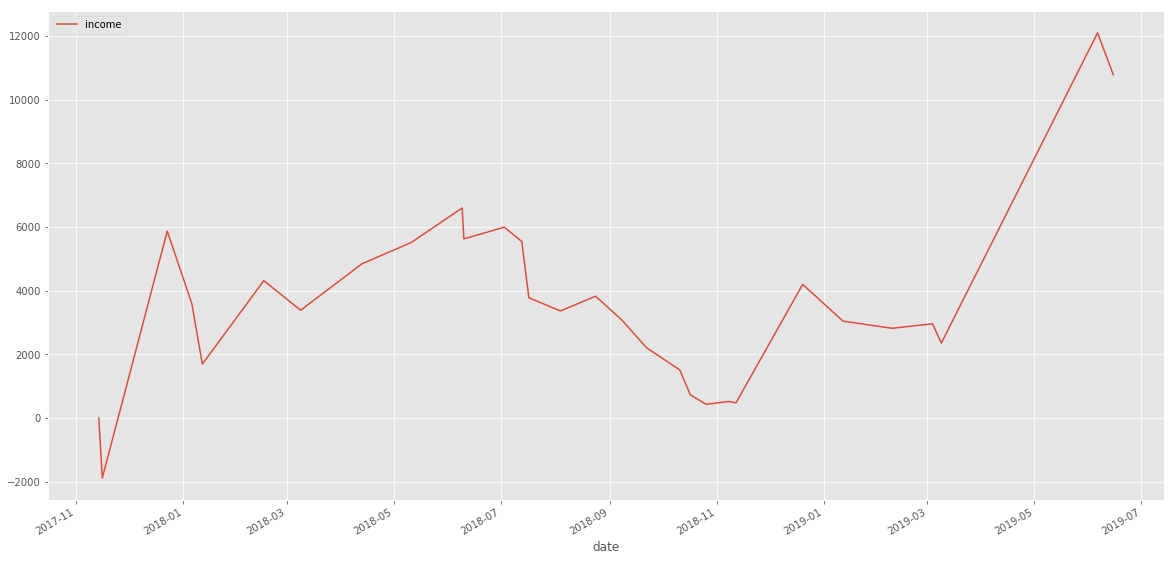

In [54]:
# 结果指标一起显示
data3.plot(figsize=(20,10))
print('最大回撤:', round((1-remains)*100, 2), '%')
print('最大回撤开始时间：', start_date)
print('最大回撤到低点时间：', end_date)
print('最大回撤突破前高时间：', end_date3)
print('最大回撤时长（高点到低点）：', delta.days, '天')
print('最大回撤时长（高点到低点到突破前高）：', delta2.days, '天')
print('年化收益率：', round(Rp*100, 2), '%')
print('回测总收益率：', round(R*100, 2), '%')

2019-06-15
